In [211]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy import stats
import seaborn as sns

In [212]:
import matplotlib.pyplot as plt
import matplotlib as mpl
matplotlib.rc("font", family = "NanumGothic") # 맑은 고딕 적용
matplotlib.rc('axes', unicode_minus=False) # 음수 표시


fastcampus 데이터 셋: 플랫폼 서비스 고객의 데이터 분석과 이탈율(churn) 분석
https://drive.google.com/drive/folders/17AzXqC30KVckMfU3m6PqCCUzLxtBdxRx

교수님 피드백내용
- 계약루트에 따른 변화 
- 유통경로에 따른 변화 
- 요일별 분석
- 지역별 데이터 분석 (계약일, 공동구매 판단)
- 기업데이터 개인데이터 수익성차이
- 기업을 위한 홍보전략
- 렌탈모델의 해지 가능성 판단

## 데이터셋1:sales

In [264]:
df_sales = pd.read_csv('rental_pre.csv')

In [265]:
df_sales

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)
0,66758234,렌탈,일반,서비스 방문,2022-10-24,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,월요일,45.0,40대,0,0,4.110269e+07
1,66755948,렌탈,교체렌탈,서비스 방문,2022-10-24,60,카드이체,DES-1,102900,계약확정,...,남자,정상,1,정상,월요일,42.0,40대,0,0,4.110269e+07
2,66756657,렌탈,일반,홈쇼핑/방송,2022-10-24,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,월요일,51.0,50대,0,0,4.110269e+07
3,66423450,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,계약확정,...,남자,정상,1,정상,월요일,42.0,40대,0,0,3.337207e+07
4,66423204,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,해약확정,...,남자,해약,1,이탈,월요일,63.0,60대,0,0,3.337207e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51270,66799607,렌탈,일반,홈쇼핑/방송,2023-02-07,60,CMS,DES-1,96900,해약확정,...,여자,해약,2,이탈,화요일,56.0,50대,1,0,4.107838e+07
51271,66796621,멤버십,멤버십B,R관리방판,2023-02-07,36,CMS,DES-1,56979,계약확정,...,여자,정상,1,정상,화요일,35.0,30대,0,0,3.459544e+07
51272,66799558,렌탈,일반,영업방판,2023-02-07,60,카드이체,DES-1,96900,해약확정,...,여자,해약,2,이탈,화요일,45.0,40대,0,0,5.188257e+07
51273,66799197,렌탈,프로모션,홈쇼핑/방송,2023-02-07,39,무통장,ERA,120900,해약확정,...,여자,해약,2,이탈,화요일,68.0,60대,1,0,4.107838e+07


In [266]:
df_sales[pd.isnull(df_sales['판매유형'])]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)


In [267]:
df_sales[pd.isnull(df_sales['계약유형'])]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)


In [268]:
df_sales[pd.isnull(df_sales['결제은행'])]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)
56,25869517,렌탈,프로모션,렌탈총판,2022-10-25,60,가상계좌,DES-1,96900,계약확정,...,여자,정상,1,정상,화요일,NaN,80대 이상,0,1,4.046420e+07
202,25777820,렌탈,프로모션,R유통사,2022-10-25,36,가상계좌,DES-1,180750,계약확정,...,여자,정상,5,정상,화요일,NaN,80대 이상,1,0,3.163798e+07
203,25777820,렌탈,프로모션,R유통사,2022-10-25,36,가상계좌,DES-1,180750,계약확정,...,여자,정상,5,정상,화요일,NaN,80대 이상,1,0,3.163798e+07
204,25777820,렌탈,프로모션,R유통사,2022-10-25,36,가상계좌,DES-1,180750,계약확정,...,여자,정상,5,정상,화요일,NaN,80대 이상,1,0,3.163798e+07
205,25777820,렌탈,프로모션,R유통사,2022-10-25,36,가상계좌,DES-1,96900,계약확정,...,여자,정상,5,정상,화요일,NaN,80대 이상,1,0,3.163798e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51251,66799099,멤버십,멤버십B,하이마트,2023-02-07,36,무통장,DES-1,56979,해약확정,...,여자,해약,1,이탈,화요일,NaN,80대 이상,0,1,4.082821e+07
51254,66799094,멤버십,멤버십B,하이마트,2023-02-07,36,무통장,DES-1,54603,해약확정,...,여자,해약,1,이탈,화요일,NaN,80대 이상,0,0,4.389112e+07
51260,66798812,멤버십,멤버십B,하이마트,2023-02-07,36,무통장,DES-1,54603,해약확정,...,여자,해약,1,이탈,화요일,NaN,80대 이상,0,0,5.188257e+07
51262,66799221,멤버십,멤버십B,하이마트,2023-02-07,36,무통장,DES-1,56979,해약확정,...,여자,해약,1,이탈,화요일,NaN,80대 이상,0,0,5.188257e+07


In [269]:
df_sales[(pd.isnull(df_sales['결제은행'])) & (df_sales['고객유형'] == '개인')]['유통경로'].unique()

array(['하이마트', '일반', '홈쇼핑/방송'], dtype=object)

In [270]:
df_sales[(df_sales['계약유형'] == '일반')& (df_sales['고객유형'] == '개인')&(df_sales['계약기간'] == 36)]['월랜탈비용'].unique()

array([102900,  96900, 110700, 108900])

In [273]:
duple = df_sales[df_sales.duplicated(subset=['고객ID'],keep=False)]['고객ID']
grouped_duplicates = duple.groupby(df_sales['고객ID'])
grouped_duplicates

group_sizes = grouped_duplicates.size().sort_values(ascending=False)
print(group_sizes)

고객ID
25777820    187
25869517     45
25733179     38
25722644     34
25863590     28
           ... 
66762001      2
25733940      2
66761998      2
66761991      2
66959118      2
Name: 고객ID, Length: 6560, dtype: int64


In [272]:
display(df_sales[df_sales['고객ID'] == 25722644])

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)
37703,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37704,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37705,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37706,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37707,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37708,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37709,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37710,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37711,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07
37712,25722644,렌탈,단체,R농협,2023-01-12,36,가상계좌,DES-2,87930,계약확정,...,여자,정상,17,정상,목요일,NaN,80대 이상,0,1,3.292053e+07


In [126]:
df_sales['판매유형'].unique()

array(['렌탈', '멤버십'], dtype=object)

In [127]:
df_sales['계약유형'].unique()

array(['일반', '교체렌탈', '멤버십S', '프로모션', '통합 패키지', '멤버십A', '멥버십C', '단체',
       '멤버십B'], dtype=object)

In [128]:
df_sales['계약기간'].unique()

array([60, 12, 36, 39])

In [129]:
df_sales['유통경로'].unique()

array(['서비스 방문', '홈쇼핑/방송', '렌탈재계약', '하이마트', '렌탈총판', '전자랜드', '홈플러스', '일반',
       '영업방판', '홈쇼핑/인터넷', 'R빌리미', 'R유통사', 'R인터넷', '이마트', 'R관리방판',
       'R농협인터넷몰', 'R농협', 'R법인', 'R렌탈운영', 'R법인그룹'], dtype=object)

In [130]:
df_sales[df_sales['유통경로'] == '렌탈재계약']

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)
3,66423450,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,계약확정,...,남자,정상,1,정상,월요일,42.0,40대,0,0,3.337207e+07
4,66423204,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,해약확정,...,남자,해약,1,이탈,월요일,63.0,60대,0,0,3.337207e+07
15,66423049,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,계약확정,...,여자,정상,1,정상,월요일,62.0,60대,0,0,3.420010e+07
18,66423249,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,계약확정,...,여자,정상,1,정상,월요일,90.0,80대 이상,0,1,3.473307e+07
20,66423230,멤버십,멤버십S,렌탈재계약,2022-10-24,12,CMS,DES-1,66900,계약확정,...,여자,정상,1,정상,월요일,46.0,40대,0,1,3.473307e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49685,66208729,멤버십,멤버십S,렌탈재계약,2023-02-03,12,CMS,DES-1,75900,계약확정,...,남자,정상,1,정상,금요일,44.0,40대,0,0,3.991531e+07
50070,25821609,멤버십,멤버십S,렌탈재계약,2023-02-04,12,CMS,DES-1,87900,계약확정,...,여자,정상,1,정상,토요일,NaN,80대 이상,1,0,3.163798e+07
50351,66441444,멤버십,멤버십S,렌탈재계약,2023-02-04,12,CMS,DES-1,66900,계약확정,...,여자,정상,1,정상,토요일,44.0,40대,0,0,3.339118e+07
50395,66442157,멤버십,멤버십S,렌탈재계약,2023-02-04,12,CMS,DES-1,66900,계약확정,...,여자,정상,1,정상,토요일,39.0,30대,0,0,3.322753e+07


In [131]:
df_sales['납부유형'].unique()

array(['CMS', '카드이체', '가상계좌', '지로', '무통장'], dtype=object)

In [132]:
df_sales['제품군'].unique()

array(['DES-1', 'DES-3A', 'DES-2', 'DES-R4', 'MMC', 'ERA'], dtype=object)

In [133]:
df_sales['계약상태'].unique()

array(['계약확정', '해약확정', '기간만료', '해약진행중'], dtype=object)

In [134]:
df_sales['연체건수'].unique()

array([ 0, 12,  1, 15,  4,  2,  9, 10,  7,  5, 11, 13,  3, -1,  8, 14,  6])

In [135]:
df_sales[df_sales['연체건수'] == -1]
#17개의 행

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)
1786,66760179,렌탈,프로모션,홈쇼핑/방송,2022-10-27,60,카드이체,DES-1,96900,계약확정,...,여자,정상,1,정상,목요일,48.0,40대,0,0,5.188257e+07
1792,66674030,렌탈,프로모션,서비스 방문,2022-10-27,60,CMS,DES-2,90900,계약확정,...,여자,정상,2,정상,목요일,57.0,50대,0,0,5.188257e+07
1813,66759728,렌탈,일반,영업방판,2022-10-27,60,CMS,DES-1,87900,계약확정,...,여자,정상,1,정상,목요일,52.0,50대,1,0,3.906773e+07
1856,66757586,렌탈,일반,서비스 방문,2022-10-27,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,목요일,49.0,40대,0,0,4.212119e+07
1898,66759913,렌탈,프로모션,홈쇼핑/방송,2022-10-27,60,카드이체,DES-1,96900,계약확정,...,여자,정상,1,정상,목요일,55.0,50대,0,0,3.576472e+07
1914,66759602,렌탈,프로모션,일반,2022-10-27,60,CMS,DES-1,105900,계약확정,...,여자,정상,1,정상,목요일,37.0,30대,1,0,4.103352e+07
1917,66757694,렌탈,프로모션,서비스 방문,2022-10-27,60,CMS,DES-2,90900,계약확정,...,여자,정상,1,정상,목요일,61.0,60대,1,0,6.050772e+07
25604,66699954,렌탈,프로모션,서비스 방문,2022-12-09,60,카드이체,DES-2,90900,계약확정,...,여자,정상,1,정상,금요일,39.0,30대,1,1,3.701039e+07
25622,66776702,렌탈,프로모션,서비스 방문,2022-12-09,60,CMS,DES-1,105900,계약확정,...,여자,정상,1,정상,금요일,74.0,70대,0,0,3.450433e+07
25623,66428737,렌탈,교체렌탈,서비스 방문,2022-12-09,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,금요일,53.0,50대,0,0,3.513077e+07


In [136]:
df_sales['신용등급'].unique()

array([ 9.,  2.,  8.,  5.,  1.,  7.,  4., nan,  3.,  6., 10.,  0.])

In [137]:
df_sales[df_sales['신용등급'] == 0]
#60명

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,남여구분,해약여부,총렌탈대수,이탈여부,요일,나이,연령대,마트,직영점,지역별 소득량(평균)
1288,66758869,렌탈,통합 패키지,홈쇼핑/방송,2022-10-26,60,CMS,DES-1,81900,계약확정,...,여자,정상,1,정상,수요일,89.0,80대 이상,0,0,3.354379e+07
1289,66758869,렌탈,통합 패키지,홈쇼핑/방송,2022-10-26,60,CMS,DES-2,81900,계약확정,...,여자,정상,1,정상,수요일,89.0,80대 이상,0,0,3.354379e+07
1810,66173830,렌탈,교체렌탈,서비스 방문,2022-10-27,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,목요일,66.0,60대,1,0,3.906773e+07
4640,66761486,렌탈,일반,서비스 방문,2022-11-01,36,CMS,DES-2,102900,계약확정,...,여자,정상,1,정상,화요일,85.0,80대 이상,0,0,3.135232e+07
5372,66762364,렌탈,일반,렌탈총판,2022-11-02,60,CMS,DES-1,96900,계약확정,...,남자,정상,1,정상,수요일,86.0,80대 이상,1,0,6.050772e+07
5798,66763086,렌탈,프로모션,홈쇼핑/방송,2022-11-03,60,CMS,DES-2,96900,계약확정,...,여자,정상,1,정상,목요일,87.0,80대 이상,0,0,3.686827e+07
5896,66762981,렌탈,일반,서비스 방문,2022-11-03,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,목요일,89.0,80대 이상,0,0,5.188257e+07
11187,66735871,렌탈,프로모션,홈쇼핑/방송,2022-11-12,60,CMS,DES-1,105900,계약확정,...,남자,정상,1,정상,토요일,56.0,50대,1,0,4.301330e+07
11870,66766761,렌탈,일반,서비스 방문,2022-11-14,60,CMS,DES-1,96900,계약확정,...,여자,정상,1,정상,월요일,79.0,70대,0,0,3.725954e+07
11898,66767111,렌탈,일반,렌탈총판,2022-11-14,60,CMS,DES-1,96900,계약확정,...,남자,정상,1,정상,월요일,NaN,80대 이상,0,0,4.485318e+07


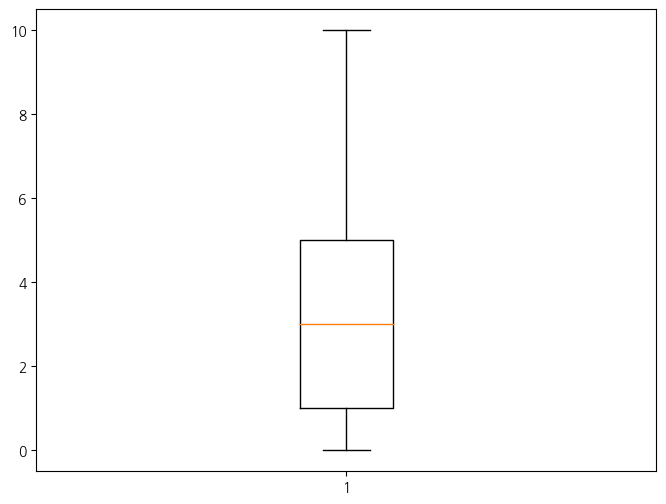

In [142]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_sales['신용등급'].dropna())
# plt.boxplot(df1[df1['신용등급'] != 0]['신용등급'].dropna())
plt.show()

In [139]:
df_sales['결제은행'].unique()

array(['새마을금고', '현대카드', '우리은행', '농협회원조합', '농협중앙회', '롯데카드', '신한은행', '국민카드',
       '부산은행', '우체국', '국민은행', '기업은행', 'SC제일은행', nan, '대구은행', '하나은행',
       '신한카드', '삼성카드', '광주은행', '외환은행', 'BC카드', '씨티은행', '신협중앙회', '경남은행',
       '미래에셋증권', '외환카드', '수협중앙회', '유안타증권', '전북은행', '상호저축은행', '대신증권',
       '산업은행', '현대증권', '산림조합중앙회', '제주은행', '삼성증권', '하나대투증권', 'SK증권',
       '수협카드', '한국투자증권', '신한금융투자', '하나SK', 'NH농협카드', '메리츠종합금융증권',
       '하이투자증권', '우리카드', '대우증권', '씨티카드'], dtype=object)

In [140]:
df_sales['해약여부'].unique()

array(['정상', '해약'], dtype=object)

## 데이터셋2: buisness_member

In [141]:
df_buisness = pd.read_csv('02 rental_member_data_business.csv')
df_buisness

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
0,25702131,사업자,NaN,NaN,경기도,경기도,화성시,여자
1,25742841,사업자,1964.0,8.0,경기도,경기도,가평군,여자
2,25742683,사업자,1973.0,12.0,서울특별시,서울특별시,강남구,여자
3,25851817,사업자,NaN,NaN,서울특별시,서울특별시,강남구,여자
4,25742687,사업자,1958.0,6.0,서울특별시,서울특별시,강남구,여자
...,...,...,...,...,...,...,...,...
3585,25731437,사업자,1972.0,12.0,경상도,대구광역시,북구,여자
3586,25731544,사업자,1983.0,10.0,충청도,대전광역시,서구,여자
3587,25731616,사업자,NaN,NaN,충청도,대전광역시,서구,여자
3588,25841997,사업자,NaN,NaN,경기도,인천광역시,서구,여자


In [299]:
df_buisness.isnull().sum()

고객ID       0
고객유형       0
생년      1779
생월      1779
거주지        0
시          1
구군         0
남여구분       0
dtype: int64

In [300]:
df_buisness[df_buisness.duplicated(subset=['고객ID'],keep=False)]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분


In [301]:
df_buisness['고객유형'].unique()

array([' 사업자'], dtype=object)

In [302]:
df_buisness['생년'].unique()

array([  nan, 1964., 1973., 1958., 1961., 1965., 1979., 1955., 1977.,
       1959., 1971., 1962., 1975., 1976., 1963., 1969., 1957., 1983.,
       1970., 1985., 1933., 1966., 1980., 1954., 1981., 1953., 1974.,
       1986., 1948., 1960., 1991., 1946., 1990., 1989., 1978., 1939.,
       1994., 1972., 1987., 1941., 1967., 1943., 1947., 1982., 1968.,
       1949., 1956., 1952., 1988., 1984., 1993., 1937., 1945., 1950.,
       1995., 1944., 1940., 1935., 1927., 1951., 1938., 1992., 1936.])

In [303]:
df_buisness['생월'].unique()

array([nan,  8., 12.,  6.,  1.,  5., 10.,  7.,  3.,  2.,  4.,  9., 11.])

In [304]:
df_buisness['거주지'].unique()

array(['경기도', '서울특별시', '경상도', '충청도', '전라도', '제주도', '강원도', '광주광역시'],
      dtype=object)

In [305]:
df_buisness['시'].unique()

array(['경기도', '서울특별시', '부산광역시', nan, '경상도', '인천광역시', '충청도', '전라도',
       '울산광역시', '광주광역시', '대구광역시', '대전광역시', '제주도', '강원도', '세종자치시'],
      dtype=object)

In [306]:
df_buisness['구군'].unique()

array([' 화성시', ' 가평군', ' 강남구', ' 강서구', ' 고양시 일산서구', ' 광명시', ' 광주시',
       ' 광진구', ' 군포시', ' 김포시', ' 김해시', ' 남동구', ' 남양주시', ' 노원구', ' 당진군',
       ' 동대문구', ' 동작구', ' 마포구', ' 무주군', ' 부평구', ' 북구', ' 사천시', ' 서구',
       ' 서초구', ' 성남시 분당구', ' 성동구', ' 송파구', ' 수원시 영통구', ' 안산시 단원구',
       ' 안양시 동안구', ' 연제구', ' 용인시 처인구', ' 울주군', ' 익산시', ' 종로구', ' 창원시 의창구',
       ' 천안시 동남구', ' 청원군', ' 청주시 상당구', ' 함양군', ' 강동구', ' 거창군', ' 계양구',
       ' 고양시 일산동구', ' 군산시', ' 남구', ' 도봉구', ' 밀양시', ' 부천시 오정구', ' 부천시 원미구',
       ' 사하구', ' 영등포구', ' 은평구', ' 의정부시', ' 전주시 완산구', ' 창원시 진해구', ' 태안군',
       ' 파주시', ' 평택시', ' 계룡시', ' 광산구', ' 구리시', ' 구미시', ' 달서구', ' 동구',
       ' 성남시 수정구', ' 수성구', ' 수원시 권선구', ' 시흥시', ' 여수시', ' 영주시', ' 용산구',
       ' 유성구', ' 전주시 덕진구', ' 제주시', ' 중구', ' 중랑구', ' 해운대구', ' 경산시', ' 관악구',
       ' 금정구', ' 남원시', ' 목포시', ' 무안군', ' 성북구', ' 안산시 상록구', ' 양천구', ' 오산시',
       ' 용인시 기흥구', ' 용인시 수지구', ' 진주시', ' 천안시 서북구', ' 청주시 흥덕구', ' 부산진구',
       ' 부천시 소사구', ' 사상구', ' 안양시 만안구', ' 원주시', ' 의왕시', ' 포항시 남구', 

In [307]:
df_buisness['남여구분'].unique()

array(['여자', '남자'], dtype=object)

## 데이터셋3: personal_member

In [308]:
df_personal = pd.read_csv('03 rental_member_data_personal.csv')
df_personal

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
0,66758234,개인,1979.0,12.0,경기도,경기도,평택시,여자
1,66755948,개인,1982.0,7.0,경기도,경기도,평택시,남자
2,66756657,개인,1973.0,4.0,경기도,경기도,평택시,여자
3,66423450,개인,1982.0,11.0,경기도,경기도,포천시,남자
4,66423204,개인,1961.0,11.0,경기도,경기도,포천시,남자
...,...,...,...,...,...,...,...,...
40041,66579515,개인,1974.0,7.0,경기도,경기도,성남시 중원구,남자
40042,66799558,개인,1979.0,10.0,경기도,경기도,성남시 중원구,여자
40043,66799197,개인,1956.0,4.0,서울특별시,서울특별시,성동구,여자
40044,66792778,개인,1967.0,10.0,서울특별시,서울특별시,성동구,여자


In [309]:
df_personal.isnull().sum()

고객ID       0
고객유형       0
생년      3801
생월      3801
거주지        1
시          0
구군         0
남여구분       0
dtype: int64

In [310]:
df_personal[df_personal.duplicated(subset=['고객ID'],keep=False)]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분


In [311]:
df_personal['고객유형'].unique()

array([' 개인'], dtype=object)

In [312]:
sorted(df_personal['생년'].unique())

[195.0,
 197.0,
 1934.0,
 1938.0,
 1944.0,
 1948.0,
 1949.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1989.0,
 nan,
 1919.0,
 1922.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1935.0,
 1936.0,
 1937.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1945.0,
 1946.0,
 1947.0,
 1950.0,
 1951.0,
 1957.0,
 1958.0,
 1967.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1988.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 199982.0,
 1999978.0]

In [313]:
df_personal[df_personal['생년']<1900]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
49,66758888,개인,195.0,3.0,경기도,경기도,고양시 덕양구,여자
68,66643114,개인,197.0,1.0,서울특별시,서울특별시,관악구,여자


In [314]:
df_personal[df_personal['생년']>2000]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
102,66419641,개인,199982.0,8.0,경상도,경상도,구미시,여자
146,66423775,개인,1999978.0,5.0,전라도,광주광역시,남구,여자


In [315]:
df_personal['생월'].unique()

array([12.,  7.,  4., 11.,  1.,  8.,  9.,  5., 10.,  3., nan,  6.,  2.])

In [316]:
df_personal['거주지'].unique()

array(['경기도', '경상도', '전라도', '충청도', '강원도', '서울특별시', nan, '제주도'],
      dtype=object)

In [317]:
df_personal['시'].unique()

array(['경기도', '경상도', '전라도', '부산광역시', '충청도', '강원도', '서울특별시', '인천광역시',
       '광주광역시', '울산광역시', '대구광역시', '대전광역시', '제주도', '세종자치시'], dtype=object)

In [318]:
df_personal['구군'].unique()

array([' 평택시', ' 포천시', ' 포항시 남구', ' 포항시 북구', ' 하동군', ' 함안군', ' 해남군',
       ' 해운대구', ' 홍성군', ' 홍천군', ' 화성시', ' 가평군', ' 강남구', ' 강동구', ' 강북구',
       ' 강서구', ' 거제시', ' 경산시', ' 계양구', ' 고양시 덕양구', ' 고양시 일산동구',
       ' 고양시 일산서구', ' 관악구', ' 광명시', ' 광산구', ' 광주시', ' 광진구', ' 구례군',
       ' 구로구', ' 구리시', ' 구미시', ' 군산시', ' 군위군', ' 군포시', ' 금정구', ' 금천구',
       ' 김천시', ' 김포시', ' 김해시', ' 남구', ' 남동구', ' 남양주시', ' 남원시', ' 노원구',
       ' 논산시', ' 단양군', ' 달서구', ' 달성군', ' 당진군', ' 대덕구', ' 도봉구', ' 동구',
       ' 동대문구', ' 동래구', ' 동작구', ' 동해시', ' 마포구', ' 무안군', ' 부산진구',
       ' 부천시 오정구', ' 부천시 원미구', ' 부평구', ' 북구', ' 사상구', ' 사천시', ' 사하구',
       ' 산청군', ' 서구', ' 서귀포시', ' 서대문구', ' 서초구', ' 성남시 분당구', ' 성남시 수정구',
       ' 성남시 중원구', ' 성동구', ' 성북구', ' 세종자치시', ' 송파구', ' 수성구', ' 수영구',
       ' 수원시 권선구', ' 수원시 영통구', ' 수원시 장안구', ' 수원시 팔달구', ' 순천시', ' 시흥시',
       ' 아산시', ' 안동시', ' 안산시 단원구', ' 안산시 상록구', ' 안성시', ' 안양시 동안구',
       ' 안양시 만안구', ' 양산시', ' 양주시', ' 양천구', ' 양평군', ' 여수시', ' 연수구', ' 연제구',
       ' 영광군', ' 영도구', ' 영

In [319]:
df_personal['남여구분'].unique()

array(['여자', '남자'], dtype=object)

In [27]:
(df_sales['이탈여부'] == '이탈')
# num_churned = (df_sales['이탈여부'] == '이탈').sum()

0        False
1        False
2        False
3        False
4         True
         ...  
51269     True
51270    False
51271     True
51272     True
51273     True
Name: 이탈여부, Length: 51274, dtype: bool

In [40]:
df_sales.head(5)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,...,고객유형,생년,거주지,시,구군,남여구분,해약여부,이탈여부,나이,연령대
0,66758234,렌탈,일반,서비스 방문,24-10-2022,60,CMS,DES-1,96900,계약확정,...,개인,1979.0,경기도,경기도,평택시,여자,정상,정상,45.0,40대
1,66755948,렌탈,교체렌탈,서비스 방문,24-10-2022,60,카드이체,DES-1,102900,계약확정,...,개인,1982.0,경기도,경기도,평택시,남자,정상,정상,42.0,40대
2,66756657,렌탈,일반,홈쇼핑/방송,24-10-2022,60,CMS,DES-1,96900,계약확정,...,개인,1973.0,경기도,경기도,평택시,여자,정상,정상,51.0,50대
3,66423450,멤버십,멤버십S,렌탈재계약,24-10-2022,12,CMS,DES-1,66900,계약확정,...,개인,1982.0,경기도,경기도,포천시,남자,정상,정상,42.0,40대
4,66423204,멤버십,멤버십S,렌탈재계약,24-10-2022,12,CMS,DES-1,66900,해약확정,...,개인,1961.0,경기도,경기도,포천시,남자,해약,이탈,63.0,60대


## 데이터 분석

In [274]:
#전체 데이터에 대하여 이탈여부가 어떻게 되는 측정
df_count = df_sales[['제품군','고객유형','이탈여부']].groupby(['이탈여부','제품군']).size()
df_sum = df_sales[['제품군','이탈여부']].groupby(['제품군']).count()
display(df_sum['이탈여부'])
# y_val = df_sales[['제품군', '이탈여부']].groupby('제품군', as_index =False).count()
div_product = df_count.loc['이탈']
display(div_product)
proportion = div_product/df_sum['이탈여부']
display(proportion)


df = {
    '제품군': ['DES-1', 'DES-2', 'DES-3A', 'DES-R4','ERA','MMC'],
    '제품별_전체_인원':list(df_sum['이탈여부']),
    '제품별_이탈_인원':list(df_count.loc['이탈']),
    '제품별_이탈_비율':list(div_product/df_sum['이탈여부'])
}

df_product = pd.DataFrame(df)
# plt.pie(proportion, labels=df_sum.index, autopct='%1.1f%%')
# plt.title('제품군별 이탈 비율')


제품군
DES-1     39110
DES-2      8992
DES-3A     2081
DES-R4      327
ERA         645
MMC         120
Name: 이탈여부, dtype: int64

제품군
DES-1     862
DES-2      71
DES-3A     10
DES-R4      4
ERA         4
MMC         2
dtype: int64

제품군
DES-1     0.022040
DES-2     0.007896
DES-3A    0.004805
DES-R4    0.012232
ERA       0.006202
MMC       0.016667
dtype: float64

In [226]:
y_product = df_sales[['제품군','고객유형','이탈여부']].groupby(['제품군','고객유형'], as_index =False).count()
# y_val = df_sales[['제품군', '이탈여부']].groupby('제품군', as_index =False).count()
y_product

,제품군,고객유형,이탈여부
0,DES-1,개인,34964
1,DES-1,사업자,4146
2,DES-2,개인,8369
3,DES-2,사업자,623
4,DES-3A,개인,1868
5,DES-3A,사업자,213
6,DES-R4,개인,316
7,DES-R4,사업자,11
8,ERA,개인,628
9,ERA,사업자,17


In [275]:
df_product.head()

,제품군,제품별_전체_인원,제품별_이탈_인원,제품별_이탈_비율
0,DES-1,39110,862,0.022040
1,DES-2,8992,71,0.007896
2,DES-3A,2081,10,0.004805
3,DES-R4,327,4,0.012232
4,ERA,645,4,0.006202


In [228]:
y_age = df_sales[['연령대','고객유형','이탈여부']].groupby(['연령대','고객유형'], as_index =False).count()
y_age

,연령대,고객유형,이탈여부
0,20대,개인,82
1,20대,사업자,2
2,30대,개인,3438
3,30대,사업자,111
4,40대,개인,14122
5,40대,사업자,675
6,50대,개인,13808
7,50대,사업자,770
8,60대,개인,7453
9,60대,사업자,425


연령대
20대          84
30대        3549
40대       14797
50대       14578
60대        7878
70대        2439
80대 이상     7950
Name: 이탈여부, dtype: int64

연령대
20대         2
30대        46
40대       135
50대       329
60대       226
70대       103
80대 이상    112
dtype: int64

연령대
20대       0.023810
30대       0.012961
40대       0.009123
50대       0.022568
60대       0.028687
70대       0.042230
80대 이상    0.014088
dtype: float64

Text(0.5, 1.0, '나이대별 이탈 비율')

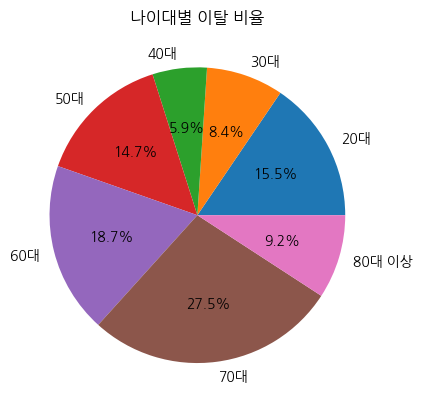

In [229]:
#전체 데이터에 대하여 이탈여부가 어떻게 되는 측정
df_count = df_sales[['연령대','고객유형','이탈여부']].groupby(['이탈여부','연령대']).size()
df_sum = df_sales[['연령대','이탈여부']].groupby(['연령대']).count()

display(df_sum['이탈여부'])##
## y_val = df_sales[['제품군', '이탈여부']].groupby('제품군', as_index =False).count()
div_age = df_count.loc['이탈']
display(div_age) ##
proportion = div_age/df_sum['이탈여부']
display(proportion)##
plt.pie(proportion, labels=df_sum.index, autopct='%1.1f%%')
plt.title('나이대별 이탈 비율')


Text(0.5, 1.0, '제품별_이탈_비율(%)')

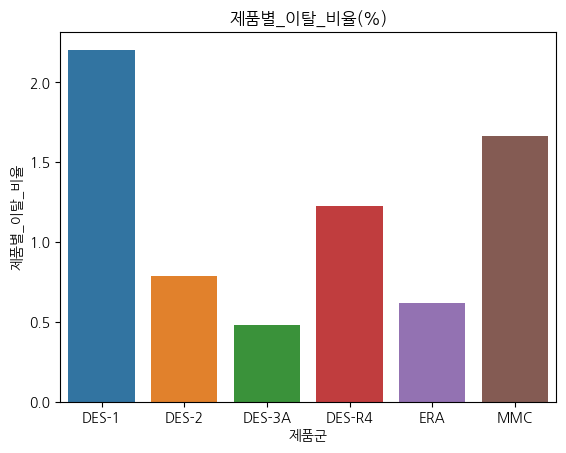

In [286]:
y_per = df_product['제품별_이탈_비율']*100
sns.barplot(data=df_product, x='제품군', y=y_per)
plt.title('제품별_이탈_비율(%)')

<Axes: xlabel='연령대', ylabel='이탈여부'>

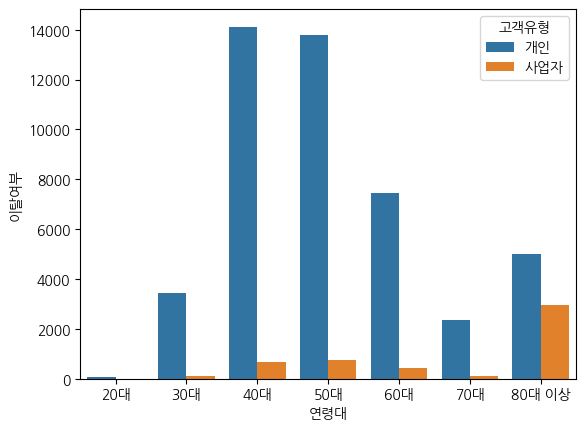

In [230]:
sns.barplot(data=y_age, x='연령대', y='이탈여부',hue = '고객유형')

In [251]:
df_product.head()

,제품군,제품별_전체_인원,제품별_이탈_인원,제품별_이탈_비율
0,DES-1,39110,862,0.022040
1,DES-2,8992,71,0.007896
2,DES-3A,2081,10,0.004805
3,DES-R4,327,4,0.012232
4,ERA,645,4,0.006202


In [282]:
cross_tab = pd.crosstab(df_product["제품군"], df_product["제품별_이탈_비율"])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-square test")
print("chi: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))



# df_product = {
#     '제품군': ['DES-1', 'DES-2', 'DES-3A', 'DES-R4','ERA','MMC'],
#     '제품별_전체_인원':list(df_sum['이탈여부']),
#     '제품별_이탈_인원':list(df_count.loc['이탈']),
#     '제품별_이탈_비율':list(div_product/df_sum['이탈여부'])
# }

Chi-square test
chi: 30.000
p: 0.224
degree of freedom: 25
expected value: 
[[0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]]


In [260]:
cross_tab = pd.crosstab(df_sales["연령대"], df_sales["이탈여부"])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab)
display(cross_tab)
print("Chi-square test")
print("chi: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

이탈여부,이탈,정상
연령대,,
20대,2,82
30대,46,3503
40대,135,14662
50대,329,14249
60대,226,7652
70대,103,2336
80대 이상,112,7838


Chi-square test
chi: 219.232
p: 0.000
degree of freedom: 6
expected value: 
[[1.5610000e+00 8.2439000e+01]
 [6.5962000e+01 3.4830380e+03]
 [2.7501800e+02 1.4521982e+04]
 [2.7094800e+02 1.4307052e+04]
 [1.4642100e+02 7.7315790e+03]
 [4.5331000e+01 2.3936690e+03]
 [1.4775900e+02 7.8022410e+03]]
